<a href="https://colab.research.google.com/github/bhaveleena3/Python/blob/main/airline_Clustering_asssign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib as plt
import seaborn as sns


In [2]:
airline=pd.ExcelFile('/content/EastWestAirlines.xlsx')



In [3]:
airline.sheet_names

['Description', 'data']

In [4]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name="data")

In [5]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
air_df=df.drop(['ID#'],axis=1)  #drop ID# column

In [7]:
air_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


# Hierarchical Clustering

In [9]:
# Customized / user defined Normalization function
# Here we can use standardized functions as well from sklearn but to show you how we can write customized function we used this code
def norm_func(i): # function name is norm_func, we can give any name here.
    x = (i-i.min())/(i.max()-i.min()) # (Xi-min)/range (Feature Scaling), Range=max-min
    return x

In [10]:
#i.min(),i.max()
air_df['Balance'].min(),air_df['Balance'].max()

(0, 1704838)

In [11]:
(28143-0)/(1704838-0)

0.01650772683386926

In [12]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(air_df.iloc[:,:]) # all coulmn are int so we normalized all

In [14]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


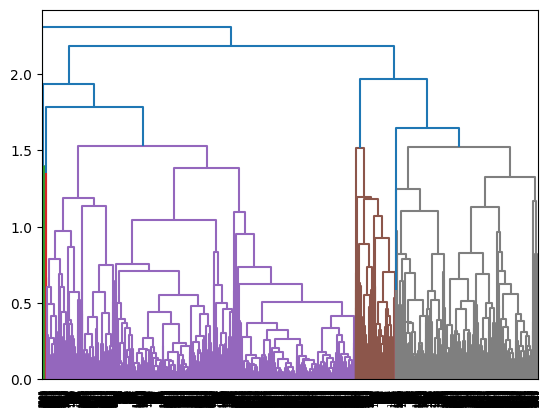

In [13]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete')) # complete linkage

In [14]:
# create clusters, suppose got input from customer that go for 4 clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [15]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [16]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm) # apply fit_predict method on dataset df_norm. We will get cluster nos. in y_hc
Clusters=pd.DataFrame(y_hc,columns=['Clusters']) # append those no. of cluster numbers create dataframe

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [17]:
y_hc

array([0, 0, 0, ..., 2, 0, 0])

In [18]:
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,2
3997,0


In [19]:
air_df['clusterID'] = Clusters

In [20]:
air_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [21]:
airline_df=air_df.sort_values(['clusterID'])
airline_df.iloc[:,:12]  #Total 4 clusters: 0,1,2,3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID
0,28143,0,1,1,1,174,1,0,0,7000,0,0
2494,142152,0,3,1,1,19464,13,0,0,3088,0,0
2495,12713,0,1,1,1,0,0,0,0,3077,0,0
2496,28848,0,1,1,1,0,0,0,0,3069,0,0
2497,10940,0,1,1,1,0,0,0,0,3062,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1624,307260,783,4,1,1,40533,24,250,1,4791,1,2
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3


# K-Means clustering

In [22]:
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(air_df.iloc[:,:])
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.32211506e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.32211506e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.32211506e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.49873235e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.32211506e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.32211506e-01]])

In [23]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
     kmeans = KMeans(n_clusters=i, init='random', random_state=0)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

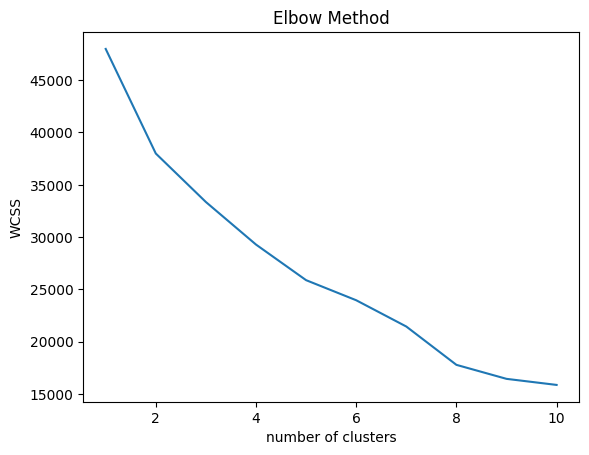

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()  #elbow curve

In [25]:
kmeans = KMeans(n_clusters=4,random_state=0)
new_predict= kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
new_predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [27]:
air_df['ClusterKID']=new_predict

In [28]:
air_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID,ClusterKID
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,1


In [29]:
air_df.groupby('ClusterKID').agg(['mean']).reset_index() # mean values of all 4 clusters

,ClusterKID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,63337.341723,192.114230,2.095837,1.012585,1.000000,15439.387222,12.190707,410.503388,1.248790,4267.667957,1.000000,1.991288
1,1,45040.809129,85.296450,1.351775,1.017520,1.000461,5283.651913,7.518211,164.962656,0.496081,3662.488704,0.000922,0.000000
2,2,156388.704992,121.546142,4.279879,1.001513,1.072617,55069.199697,20.479576,395.136157,1.201210,5263.164902,0.500756,0.565809
3,3,204689.602941,827.279412,2.279412,1.044118,1.000000,34943.904412,29.110294,5858.264706,17.154412,4696.529412,0.845588,1.426471


In [30]:
air_df[air_df['ClusterKID']==0] # records comes under cluster 0

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID,ClusterKID
7,20856,0,1,1,1,5250,4,250,1,6938,1,2,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,2,0
17,13958,0,1,1,1,4291,5,0,0,6905,1,2,0
18,91473,0,3,1,1,27408,17,0,0,6903,1,2,0
19,23354,0,3,1,1,10447,5,0,0,6896,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,2,0
3989,2622,0,1,1,1,1625,6,0,0,1404,1,2,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,0


In [44]:
air_df[air_df['ClusterKID']==1] # records comes under cluster 1






,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID,ClusterKID
8,443003,0,3,2,1,1753,43,3850,12,6948,1,2,1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,2,1
94,185549,0,5,1,1,110859,39,2950,16,6778,1,1,1
127,213150,0,4,1,1,56308,41,5200,14,7645,1,1,1
135,259484,1776,1,1,1,19172,26,7172,23,6723,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,0,1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,0,1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,0,1
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,0,1


In [45]:
air_df[air_df['ClusterKID']==2] # records comes under cluster 2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID,ClusterKID
7,20856,0,1,1,1,5250,4,250,1,6938,1,2,2
9,104860,0,3,1,1,28426,28,1150,3,6931,1,2,2
17,13958,0,1,1,1,4291,5,0,0,6905,1,2,2
18,91473,0,3,1,1,27408,17,0,0,6903,1,2,2
19,23354,0,3,1,1,10447,5,0,0,6896,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,2,2
3989,2622,0,1,1,1,1625,6,0,0,1404,1,2,2
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,2


In [46]:
air_df[air_df['ClusterKID']==3] # records comes under cluster 3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID,ClusterKID
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
6,84914,0,3,1,1,27482,25,0,0,6994,0,0,3
11,96522,0,5,1,1,61105,19,0,0,6924,1,1,3
15,28495,0,4,1,1,49442,15,0,0,6912,1,1,3
16,51890,0,4,1,1,48963,16,0,0,6910,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,84979,0,4,1,1,36702,16,0,0,1600,0,0,3
3930,40424,0,4,1,1,44110,26,343,3,1523,1,2,3
3966,91605,0,4,1,1,37840,18,0,0,1444,0,0,3
3974,58387,0,3,1,1,14581,39,0,0,1435,0,0,3
